# Case Study

#### Model selection for Clustering

Clustering is unsupervised learning: the resulting clusters are completely derived from data distributed in given a feature set with no class available

Compared to supervised learning counterparts, it is …
* hard to define model performance (cluster quality)
* sensitive to different clustering algorithms and different feature spaces.



#### Task
The aim is to try K-means and Agglomerative clustering algorithms and a range of the potential parameter(s) which affect the number of clusters on 5K colorectal patches represented by two different representations: **PathologyGAN** and **ResNet50**

* K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Hierarchical Clustering, 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering



#### Data and its preprocessing 
5,000 non-overlapping image patches from hematoxylin & eosin (H&E) stained histological images of human colorectal cancer (CRC) and normal tissue.
* 2 feature sets, PathologyGAN and ResNet50 are extracted to represent those 5,000 images different dimensional feature spaces.
* PCA and UMAP were employed to reduce each feature sapce into 100-dimensional vectors

* 9 tissue types are also available which include Adipose (ADI), background (BACK), debris (DEB), lymphocytes (LYM), mucus (MUC), smooth muscle (MUS), normal colon mucosa (NORM), cancer-associated stroma (STR), colorectal adenocarcinoma epithelium (TUM)


#### Performance Measurement
To assess quality of clustering solutions, the following measurements were imployed:
* Silhouette Score for goodness of fit test
* Vmeasure Score for homogeneity and completeness test (tissue type available as ground truth)
* Clusters visualisations

#### Required Packages

In [4]:
# !pip install h5py==2.10.0
# !pip install numpy
# !pip install pandas
# !pip install sklearn
# !pip install --user scikit-network
# !pip install pickle-mixin==1.0.2
# !pip install matplotlib
# !pip install plotly

### Prepare Tissue Representations

In [2]:
import h5py
import numpy as np
import pickle
import pandas as pd

In [3]:
pge_path = 'colon_nct_feature/pge_dim_reduced_feature.h5'
resnet50_path = 'colon_nct_feature/resnet50_dim_reduced_feature.h5'
inceptionv3_path = 'colon_nct_feature/inceptionv3_dim_reduced_feature.h5'
vgg16_path = 'colon_nct_feature/vgg16_dim_reduced_feature.h5'

pge_content = h5py.File(pge_path, mode='r')
resnet50_content = h5py.File(resnet50_path, mode='r')
inceptionv3_content = h5py.File(inceptionv3_path, mode='r')
vgg16_content = h5py.File(vgg16_path, mode='r')


In [4]:
#PCA feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_pca_feature  = pge_content['pca_feature'][...]
resnet50_pca_feature  = resnet50_content['pca_feature'][...]
inceptionv3_pca_feature = inceptionv3_content['pca_feature'][...]
vgg16_pca_feature  = vgg16_content['pca_feature'][...]

pge_pca_feature_df = pd.DataFrame(pge_pca_feature)
resnet_50_pca_feature_df = pd.DataFrame(resnet50_pca_feature) 
#inceptionv3_pca_feature_df = df.DataFrame(inceptionv3_pca_feature)
vgg16_pca_feature_df = pd.DataFrame(vgg16_pca_feature)


In [5]:
#UMAP feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_umap_feature  = pge_content['umap_feature'][...]
resnet50_umap_feature = resnet50_content['umap_feature'][...]
inceptionv3_umap_feature  = inceptionv3_content['umap_feature'][...]
vgg16_umap_feature  = vgg16_content['umap_feature'][...]

In [6]:
#tissue type as available ground-truth: labels
filename  = np.squeeze(pge_content['file_name'])
print(filename)
labels = np.array([x.split('/')[2] for x in filename])
print(labels)

['coad_nct_images/NCT-CRC-HE-100K/ADI/ADI-AAGQKKEG.tif'
 'coad_nct_images/NCT-CRC-HE-100K/ADI/ADI-AAVHMEVH.tif'
 'coad_nct_images/NCT-CRC-HE-100K/ADI/ADI-AAVISFAG.tif' ...
 'coad_nct_images/NCT-CRC-HE-100K/TUM/TUM-YWVCKIIG.tif'
 'coad_nct_images/NCT-CRC-HE-100K/TUM/TUM-YYGPFNTH.tif'
 'coad_nct_images/NCT-CRC-HE-100K/TUM/TUM-YYRCFCFC.tif']
['ADI' 'ADI' 'ADI' ... 'TUM' 'TUM' 'TUM']


# Case Study 

# Preparing the dataset for both PGE and Resnet50

In [24]:
#PCA feature from 2 feature sets: pge_latent, resnet50_latent
pge_pca_feature  = pge_content['pca_feature'][...]
resnet50_pca_feature  = resnet50_content['pca_feature'][...]

#UMAP feature from 2 feature sets: pge_latent, resnet50_latent
pge_umap_feature  = pge_content['umap_feature'][...]
resnet50_umap_feature = resnet50_content['umap_feature'][...]

#test data PGE
test_data_1 = pge_pca_feature
test_data_1_2 = pge_umap_feature
#labels
filename  = np.squeeze(pge_content['file_name'])
labels_pge = np.array([x.split('/')[2] for x in filename])

#test data ResNet50
test_data_2 = resnet50_pca_feature
test_data_2_2 = resnet50_umap_feature
#labels
filename  = np.squeeze(resnet50_content['file_name'])
labels_resnet = np.array([x.split('/')[2] for x in filename])

## Part 1: K-Means Clustering

### Training the model using N=2...50 to find the optimal number of cluster using the Elbow method.

In [25]:
from sklearn.cluster import KMeans

Sum_of_squared_distances_pca_pge = []
Sum_of_squared_distances_umap_pge = []
Sum_of_squared_distances_pca_resnet = []
Sum_of_squared_distances_umap_resnet = []

K = list(range(2,50))

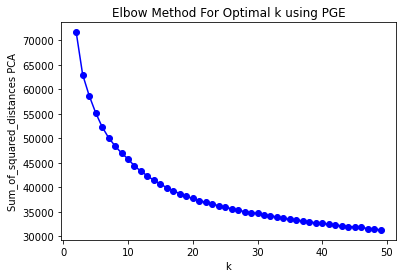

In [26]:
for k in K:
    km = KMeans(n_clusters=k)
    km_pca_pge = km.fit(test_data_1)
    Sum_of_squared_distances_pca_pge.append(km_pca_pge.inertia_)
    
plt.plot(K, Sum_of_squared_distances_pca_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances PCA')
plt.title('Elbow Method For Optimal k using PGE')
plt.show()

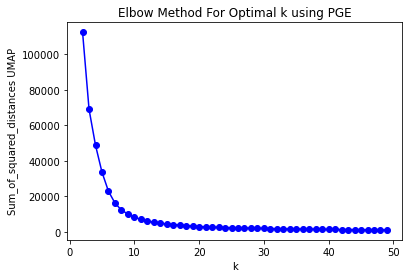

In [27]:
for k in K:
    km = KMeans(n_clusters=k)
    km_umap_pge = km.fit(test_data_1_2)
    Sum_of_squared_distances_umap_pge.append(km_umap_pge.inertia_)

plt.plot(K, Sum_of_squared_distances_umap_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances UMAP')
plt.title('Elbow Method For Optimal k using PGE')
plt.show()

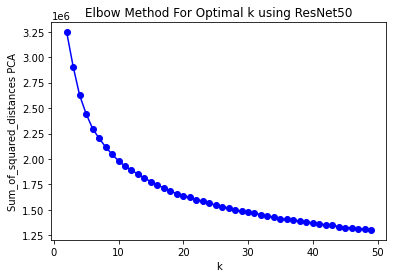

In [28]:
for k in K:
    km = KMeans(n_clusters=k)
    km_pca_resnet = km.fit(test_data_2)
    Sum_of_squared_distances_pca_resnet.append(km_pca_resnet.inertia_)
    
plt.plot(K, Sum_of_squared_distances_pca_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances PCA')
plt.title('Elbow Method For Optimal k using ResNet50')
plt.show()

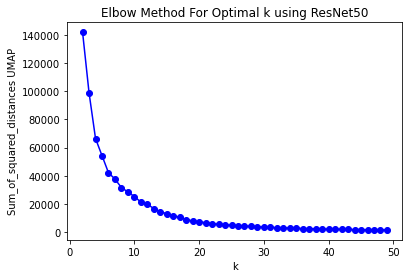

In [29]:
for k in K:
    km = KMeans(n_clusters=k)
    km_umap_resnet = km.fit(test_data_2_2)
    Sum_of_squared_distances_umap_resnet.append(km_umap_resnet.inertia_)

plt.plot(K, Sum_of_squared_distances_umap_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances UMAP')
plt.title('Elbow Method For Optimal k using ResNet50')
plt.show()

## Evaluation and Visualizing

### We can observe from the above graphs that it is difficult to derive the exact k value using only the Elbow method from the curve. Hence, to get a better measurement, we are also calculating the silhouette score and v-measure to obtain the best k-value for both the feature sets.

### Assuming the ground truth labels are not present, we are finding the 'k' using sillhouete score to find which 'k' perfectly fits the data.

In [30]:
silhouette_scores_pca_pge = []
silhouette_scores_umap_pge = []
silhouette_scores_pca_resnet = []
silhouette_scores_umap_resnet = []

Best k for PGE feature set using PCA: 2


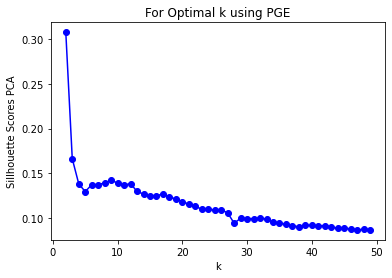

In [31]:
for k in K:
    kmeans_model_pge = KMeans(n_clusters = k, random_state = 0) 
    kmeans_assignment_pca_pge = kmeans_model_pge.fit_predict(test_data_1)
    
    kmeans_silhouette_pge = silhouette_score(test_data_1, kmeans_assignment_pca_pge)
    silhouette_scores_pca_pge.append(kmeans_silhouette_pge)

print("Best k for PGE feature set using PCA:",silhouette_scores_pca_pge.index(max(silhouette_scores_pca_pge))+2)

plt.plot(K, silhouette_scores_pca_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('Sillhouette Scores PCA')
plt.title('For Optimal k using PGE')
plt.show()

Best k for PGE feature set using UMAP: 7


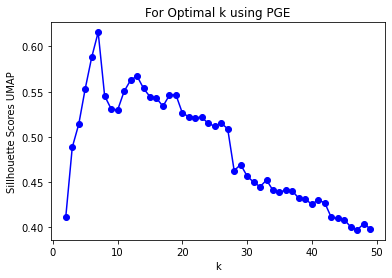

In [32]:
for k in K:
    kmeans_model_pge = KMeans(n_clusters = k, random_state = 0) 
    kmeans_assignment_umap_pge = kmeans_model_pge.fit_predict(test_data_1_2)
    
    kmeans_silhouette_pge = silhouette_score(test_data_1_2, kmeans_assignment_umap_pge)
    silhouette_scores_umap_pge.append(kmeans_silhouette_pge)

print("Best k for PGE feature set using UMAP:",silhouette_scores_umap_pge.index(max(silhouette_scores_umap_pge))+2)

plt.plot(K, silhouette_scores_umap_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('Sillhouette Scores UMAP')
plt.title('For Optimal k using PGE')
plt.show()

Best k for ResNet50 feature set using PCA: 4


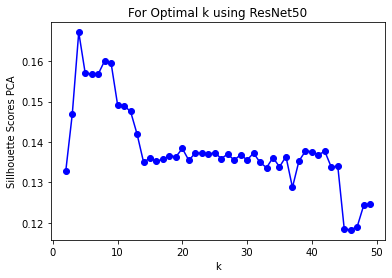

In [33]:
for k in K:
    kmeans_model_resnet = KMeans(n_clusters = k, random_state = 0) 
    kmeans_assignment_pca_resnet = kmeans_model_resnet.fit_predict(test_data_2)
    
    kmeans_silhouette_resnet = silhouette_score(test_data_2, kmeans_assignment_pca_resnet)
    silhouette_scores_pca_resnet.append(kmeans_silhouette_resnet)

print("Best k for ResNet50 feature set using PCA:",silhouette_scores_pca_resnet.index(max(silhouette_scores_pca_resnet))+2)

plt.plot(K, silhouette_scores_pca_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('Sillhouette Scores PCA')
plt.title('For Optimal k using ResNet50')
plt.show()

Best k for ResNet50 feature set using UMAP: 21


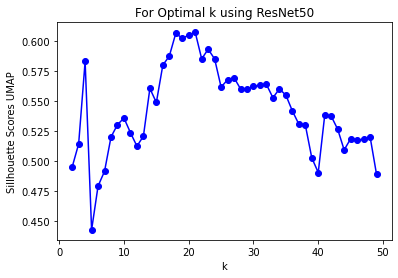

In [34]:
for k in K:
    kmeans_model_resnet = KMeans(n_clusters = k, random_state = 0) 
    kmeans_assignment_umap_resnet = kmeans_model_resnet.fit_predict(test_data_2_2)
    
    kmeans_silhouette_resnet = silhouette_score(test_data_2_2, kmeans_assignment_umap_resnet)
    silhouette_scores_umap_resnet.append(kmeans_silhouette_resnet)

print("Best k for ResNet50 feature set using UMAP:",silhouette_scores_umap_resnet.index(max(silhouette_scores_umap_resnet))+2)

plt.plot(K, silhouette_scores_umap_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('Sillhouette Scores UMAP')
plt.title('For Optimal k using ResNet50')
plt.show()

### Considering that we have the ground truth labels present, we are obtaining the optimal 'k' using V-Measure to determine the 'k' having the correct cluster quality.

In [35]:
v_measure_scores_pca_pge =  []
v_measure_scores_umap_pge =  []
v_measure_scores_pca_resnet =  []
v_measure_scores_umap_resnet =  []

Best k for PGE feature set: 24


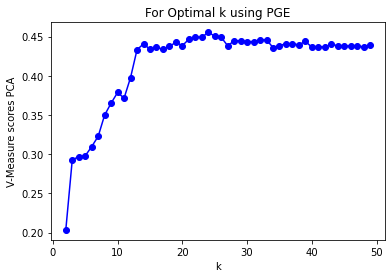

In [36]:
for k in K:
    kmeans_model_pge = KMeans(n_clusters = k, random_state = 0) 
    kmeans_assignment_pca_pge = kmeans_model_pge.fit_predict(test_data_1)
    
    kmeans_v_measure_pge = v_measure_score(labels_pge, kmeans_assignment_pca_pge)
    v_measure_scores_pca_pge.append(kmeans_v_measure_pge)

print("Best k for PGE feature set:",v_measure_scores_pca_pge.index(max(v_measure_scores_pca_pge))+2)

plt.plot(K, v_measure_scores_pca_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores PCA')
plt.title('For Optimal k using PGE')
plt.show()

Best k for PGE feature set: 19


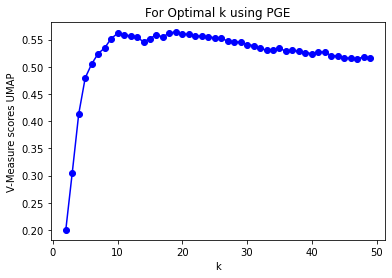

In [37]:
for k in K:
    kmeans_model_pge = KMeans(n_clusters = k, random_state = 0) 
    kmeans_assignment_umap_pge = kmeans_model_pge.fit_predict(test_data_1_2)
    
    kmeans_v_measure_pge = v_measure_score(labels_pge, kmeans_assignment_umap_pge)
    v_measure_scores_umap_pge.append(kmeans_v_measure_pge)

print("Best k for PGE feature set:",v_measure_scores_umap_pge.index(max(v_measure_scores_umap_pge))+2)

plt.plot(K, v_measure_scores_umap_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores UMAP')
plt.title('For Optimal k using PGE')
plt.show()

Best k for ResNet feature set: 31


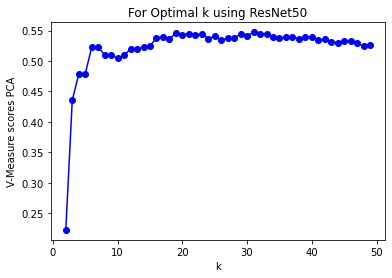

In [38]:
for k in K:
    kmeans_model_resnet = KMeans(n_clusters = k, random_state = 0) 
    kmeans_assignment_pca_resnet = kmeans_model_resnet.fit_predict(test_data_2)

    kmeans_v_measure_resnet = v_measure_score(labels_resnet, kmeans_assignment_pca_resnet)
    v_measure_scores_pca_resnet.append(kmeans_v_measure_resnet)
    
print("Best k for ResNet feature set:",v_measure_scores_pca_resnet.index(max(v_measure_scores_pca_resnet))+2)

plt.plot(K, v_measure_scores_pca_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores PCA')
plt.title('For Optimal k using ResNet50')
plt.show()

Best k for ResNet50 feature set: 15


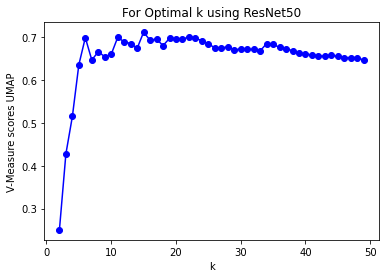

In [39]:
for k in K:
    kmeans_model_resnet = KMeans(n_clusters = k, random_state = 0)
    kmeans_assignment_umap_resnet = kmeans_model_resnet.fit_predict(test_data_2_2)

    kmeans_v_measure_resnet = v_measure_score(labels_resnet, kmeans_assignment_umap_resnet)
    v_measure_scores_umap_resnet.append(kmeans_v_measure_resnet)
    
print("Best k for ResNet50 feature set:",v_measure_scores_umap_resnet.index(max(v_measure_scores_umap_resnet))+2)

plt.plot(K, v_measure_scores_umap_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores UMAP')
plt.title('For Optimal k using ResNet50')
plt.show()

In [40]:
best_k_pge_pca_silhouette_score = silhouette_scores_pca_pge.index(max(silhouette_scores_pca_pge))+2
best_k_pge_umap_silhouette_score = silhouette_scores_umap_pge.index(max(silhouette_scores_umap_pge))+2
best_k_resnet_pca_silhouette_score = silhouette_scores_pca_resnet.index(max(silhouette_scores_pca_resnet))+2
best_k_resnet_umap_silhouette_score = silhouette_scores_umap_resnet.index(max(silhouette_scores_umap_resnet))+2

best_k_pge_pca_v_measure = v_measure_scores_pca_pge.index(max(v_measure_scores_pca_pge))+2
best_k_pge_umap_v_measure = v_measure_scores_umap_pge.index(max(v_measure_scores_umap_pge))+2
best_k_resnet_pca_v_measure = v_measure_scores_pca_resnet.index(max(v_measure_scores_pca_resnet))+2
best_k_resnet_umap_v_measure = v_measure_scores_umap_resnet.index(max(v_measure_scores_umap_resnet))+2

### Below are the member of the cluster for PGE and ResNet50 using PCA projections.

### Optimal Clusters 'k' using V-Measure:

In [41]:
print('Using PCA:')
kmeans_model_pge = KMeans(n_clusters = best_k_pge_pca_v_measure, random_state = 0) 
kmeans_assignment_pge = kmeans_model_pge.fit_predict(test_data_1)
kmeans_model_resnet = KMeans(n_clusters = best_k_resnet_pca_v_measure , random_state = 0) 
kmeans_assignment_resnet = kmeans_model_resnet.fit_predict(test_data_2)
print('Number of clusters from KMeans-PGE: %d and from KMeans-ResNet: %d'%(np.unique(kmeans_assignment_pge).shape[0],np.unique(kmeans_assignment_resnet).shape[0]))

kmeans_counts_pge = np.unique(kmeans_assignment_pge, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': kmeans_counts_pge[0], 'Number of members':kmeans_counts_pge[1]}).set_index('Cluster Index')


print('Kmeans-PGE_PCA assignment counts')
pge_df

Using PCA:
Number of clusters from KMeans-PGE: 24 and from KMeans-ResNet: 31
Kmeans-PGE_PCA assignment counts


,Number of members
Cluster Index,
0,167
1,302
2,129
3,411
4,122
5,457
6,148
7,236
8,117


In [42]:
kmeans_counts_resnet = np.unique(kmeans_assignment_resnet, return_counts = True)
resnet_df = pd.DataFrame({'Cluster Index': kmeans_counts_resnet[0], 'Number of members':kmeans_counts_resnet[1]}).set_index('Cluster Index')

print('Kmeans-ResNet50-PCA assignment counts')
resnet_df

Kmeans-ResNet50-PCA assignment counts


,Number of members
Cluster Index,
0,76
1,131
2,149
3,77
4,227
5,305
6,214
7,161
8,207


Below are the member of the cluster for PGE and ResNet50 using UMAP projections.

In [43]:
print('Using UMAP:')
kmeans_model_pge = KMeans(n_clusters = best_k_pge_umap_v_measure, random_state = 0) 
kmeans_assignment_pge = kmeans_model_pge.fit_predict(test_data_1)
kmeans_model_resnet = KMeans(n_clusters = best_k_resnet_umap_v_measure , random_state = 0) 
kmeans_assignment_resnet = kmeans_model_resnet.fit_predict(test_data_2)
print('Number of clusters from KMeans-PGE: %d and from KMeans-ResNet: %d'%(np.unique(kmeans_assignment_pge).shape[0],np.unique(kmeans_assignment_resnet).shape[0]))

kmeans_counts_pge = np.unique(kmeans_assignment_pge, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': kmeans_counts_pge[0], 'Number of members':kmeans_counts_pge[1]}).set_index('Cluster Index')


print('Kmeans-PGE-UMAP assignment counts')
pge_df

Using UMAP:
Number of clusters from KMeans-PGE: 19 and from KMeans-ResNet: 15
Kmeans-PGE-UMAP assignment counts


,Number of members
Cluster Index,
0,188
1,280
2,189
3,354
4,326
5,305
6,167
7,400
8,68


In [44]:
kmeans_counts_resnet = np.unique(kmeans_assignment_resnet, return_counts = True)
resnet_df = pd.DataFrame({'Cluster Index': kmeans_counts_resnet[0], 'Number of members':kmeans_counts_resnet[1]}).set_index('Cluster Index')

print('Kmeans-ResNet50-UMAP assignment counts')
resnet_df

Kmeans-ResNet50-UMAP assignment counts


,Number of members
Cluster Index,
0,367
1,389
2,326
3,443
4,551
5,212
6,166
7,229
8,340


### But in real life application of unsupervised learning:

### 1. V-Measure is not a feasible measure to find the optimal number of clusters 'k' for a given dataset.
### 2. The real labels are never available in practical applications.

### Hence, we are considering the silhouette score to find the optimal number of clusters 'k' whose value ranges from -1 to 1. The optimal cluster 'k' where we get the best fit is provided below along with its members:

In [45]:
print('Using PCA:')
kmeans_model_pge = KMeans(n_clusters = best_k_pge_pca_silhouette_score, random_state = 0) 
kmeans_assignment_pge = kmeans_model_pge.fit_predict(test_data_1)
kmeans_model_resnet = KMeans(n_clusters = best_k_resnet_pca_silhouette_score , random_state = 0) 
kmeans_assignment_resnet = kmeans_model_resnet.fit_predict(test_data_2)
# print('Number of clusters from KMeans-PGE: %d and from KMeans-ResNet: %d'%(np.unique(kmeans_assignment_pge).shape[0],np.unique(kmeans_assignment_resnet).shape[0]))

kmeans_counts_pge = np.unique(kmeans_assignment_pge, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': kmeans_counts_pge[0], 'Number of members':kmeans_counts_pge[1]}).set_index('Cluster Index')


print('Kmeans-PGE_PCA assignment counts')
pge_df

Using PCA:
Kmeans-PGE_PCA assignment counts


,Number of members
Cluster Index,
0,1329
1,3671


In [46]:
kmeans_counts_resnet = np.unique(kmeans_assignment_resnet, return_counts = True)
resnet_df = pd.DataFrame({'Cluster Index': kmeans_counts_resnet[0], 'Number of members':kmeans_counts_resnet[1]}).set_index('Cluster Index')

print('Kmeans-ResNet50-PCA assignment counts')
resnet_df

Kmeans-ResNet50-PCA assignment counts


,Number of members
Cluster Index,
0,415
1,1031
2,2825
3,729


In [47]:
print('Using UMAP:')
kmeans_model_pge = KMeans(n_clusters = best_k_pge_umap_silhouette_score, random_state = 0) 
kmeans_assignment_pge = kmeans_model_pge.fit_predict(test_data_1)
kmeans_model_resnet = KMeans(n_clusters = best_k_resnet_umap_silhouette_score , random_state = 0) 
kmeans_assignment_resnet = kmeans_model_resnet.fit_predict(test_data_2)
# print('Number of clusters from KMeans-PGE: %d and from KMeans-ResNet: %d'%(np.unique(kmeans_assignment_pge).shape[0],np.unique(kmeans_assignment_resnet).shape[0]))

kmeans_counts_pge = np.unique(kmeans_assignment_pge, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': kmeans_counts_pge[0], 'Number of members':kmeans_counts_pge[1]}).set_index('Cluster Index')


print('Kmeans-PGE-UMAP assignment counts')
pge_df

Using UMAP:
Kmeans-PGE-UMAP assignment counts


,Number of members
Cluster Index,
0,383
1,810
2,890
3,570
4,1047
5,518
6,782


In [48]:
kmeans_counts_resnet = np.unique(kmeans_assignment_resnet, return_counts = True)
resnet_df = pd.DataFrame({'Cluster Index': kmeans_counts_resnet[0], 'Number of members':kmeans_counts_resnet[1]}).set_index('Cluster Index')

print('Kmeans-ResNet50-UMAP assignment counts')
resnet_df

Kmeans-ResNet50-UMAP assignment counts


,Number of members
Cluster Index,
0,329
1,270
2,275
3,148
4,164
5,207
6,222
7,237
8,293


# Final Metrics of K-Means Clustering

In [49]:
pge_pca_silhouette_score = max(silhouette_scores_pca_pge)
pge_umap_silhouette_score = max(silhouette_scores_umap_pge)
resnet_pca_silhouette_score = max(silhouette_scores_pca_resnet)
resnet_umap_silhouette_score = max(silhouette_scores_umap_resnet)

pge_pca_v_measure = max(v_measure_scores_pca_pge)
pge_umap_v_measure = max(v_measure_scores_umap_pge)
resnet_pca_v_measure = max(v_measure_scores_pca_resnet)
resnet_umap_v_measure = max(v_measure_scores_umap_resnet)

#####Storing the values for final evaluation######################

Kmeans_best_k_pca_pge = best_k_pge_pca_silhouette_score
Kmeans_best_k_umap_pge = best_k_pge_umap_silhouette_score
Kmeans_best_k_pca_resnet = best_k_resnet_pca_silhouette_score
Kmeans_best_k_umap_resnet = best_k_resnet_umap_silhouette_score

pd.DataFrame({'Metrics': ['silhouette-PCA', 'silhouette-UMAP','VMeasure-PCA','VMeasure-UMAP'], 'PGE': [pge_pca_silhouette_score,pge_umap_silhouette_score,pge_pca_v_measure,pge_umap_v_measure ],'ResNet50':[resnet_pca_silhouette_score, resnet_umap_silhouette_score,resnet_pca_v_measure,resnet_umap_v_measure]}).set_index('Metrics')

,PGE,ResNet50
Metrics,,
silhouette-PCA,0.307905,0.167148
silhouette-UMAP,0.615687,0.607017
VMeasure-PCA,0.455538,0.547355
VMeasure-UMAP,0.563564,0.712187


# Part 2: Hierarchical Clustering(Agglomerative Clustering)

In [50]:
from sklearn.cluster import AgglomerativeClustering

K = list(range(2,50))

### Here, we are using linkage as 'single' to cluster based on the nearest branch available and evaluating the respective performance measurements to determine the optimal value of the k.

Best k for PGE feature set: 2


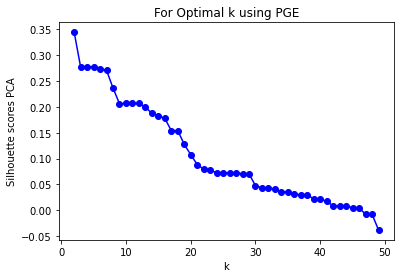

In [51]:
silhouette_scores_pca_pge =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1)
    
    agglo_silhouette_pge = silhouette_score(test_data_1, agglo_assignment_pca_pge)
    silhouette_scores_pca_pge.append(agglo_silhouette_pge)
    
print("Best k for PGE feature set:",silhouette_scores_pca_pge.index(max(silhouette_scores_pca_pge))+2)

plt.plot(K, silhouette_scores_pca_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette scores PCA')
plt.title('For Optimal k using PGE')
plt.show()

Best k for ResNet feature set: 2


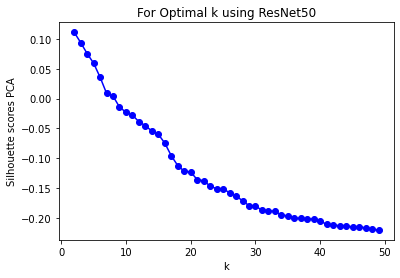

In [52]:
silhouette_scores_pca_resnet =  []

for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2)
    
    agglo_silhouette_resnet = silhouette_score(test_data_2, agglo_assignment_pca_resnet)
    silhouette_scores_pca_resnet.append(agglo_silhouette_resnet)
    
print("Best k for ResNet feature set:",silhouette_scores_pca_resnet.index(max(silhouette_scores_pca_resnet))+2)

plt.plot(K, silhouette_scores_pca_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette scores PCA')
plt.title('For Optimal k using ResNet50')
plt.show()

Best k for PGE feature set: 9


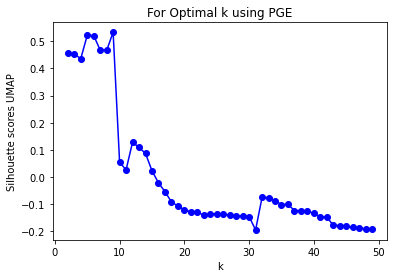

In [53]:
silhouette_scores_umap_pge =  []

for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_assignment_umap_pge = agglo_model.fit_predict(test_data_1_2)
    
    agglo_silhouette_pge = silhouette_score(test_data_1_2, agglo_assignment_umap_pge)
    silhouette_scores_umap_pge.append(agglo_silhouette_pge)
    
print("Best k for PGE feature set:",silhouette_scores_umap_pge.index(max(silhouette_scores_umap_pge))+2)

plt.plot(K, silhouette_scores_umap_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette scores UMAP')
plt.title('For Optimal k using PGE')
plt.show()

Best k for ResNet feature set: 20


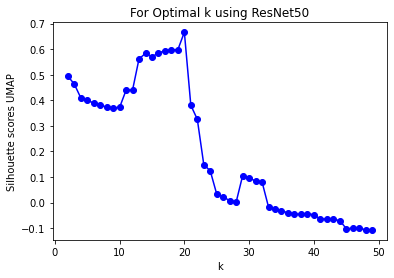

In [54]:
silhouette_scores_umap_resnet =  []

for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_assignment_umap_resnet = agglo_model.fit_predict(test_data_2_2)
    
    agglo_silhouette_resnet = silhouette_score(test_data_2_2, agglo_assignment_umap_resnet)
    silhouette_scores_umap_resnet.append(agglo_silhouette_resnet)
    
print("Best k for ResNet feature set:",silhouette_scores_umap_resnet.index(max(silhouette_scores_umap_resnet))+2)

plt.plot(K, silhouette_scores_umap_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette scores UMAP')
plt.title('For Optimal k using ResNet50')
plt.show()

Best k for PGE feature set: 49


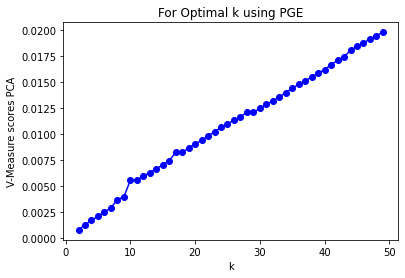

In [55]:
v_measure_scores_pca_pge =  []

for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1)

    agglo_v_measure_pge = v_measure_score(labels_pge, agglo_assignment_pca_pge)
    v_measure_scores_pca_pge.append(agglo_v_measure_pge)
    
print("Best k for PGE feature set:",v_measure_scores_pca_pge.index(max(v_measure_scores_pca_pge))+2)

plt.plot(K, v_measure_scores_pca_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores PCA')
plt.title('For Optimal k using PGE')
plt.show()

Best k for PGE feature set: 12


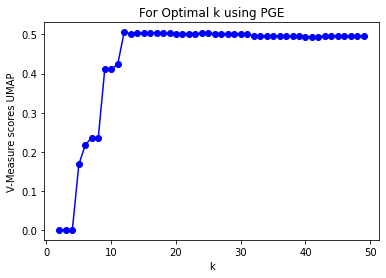

In [56]:
v_measure_scores_umap_pge =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_assignment_umap_pge = agglo_model.fit_predict(test_data_1_2)

    agglo_v_measure_pge = v_measure_score(labels_pge, agglo_assignment_umap_pge)
    v_measure_scores_umap_pge.append(agglo_v_measure_pge)
    
print("Best k for PGE feature set:",v_measure_scores_umap_pge.index(max(v_measure_scores_umap_pge))+2)

plt.plot(K, v_measure_scores_umap_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores UMAP')
plt.title('For Optimal k using PGE')
plt.show()

Best k for ResNet feature set: 49


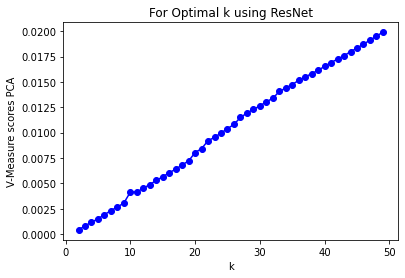

In [57]:
v_measure_scores_pca_resnet =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2)

    agglo_v_measure_resnet = v_measure_score(labels_pge, agglo_assignment_pca_resnet)
    v_measure_scores_pca_resnet.append(agglo_v_measure_resnet)
    
print("Best k for ResNet feature set:",v_measure_scores_pca_resnet.index(max(v_measure_scores_pca_resnet))+2)

plt.plot(K, v_measure_scores_pca_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores PCA')
plt.title('For Optimal k using ResNet')
plt.show()

Best k for ResNet feature set: 33


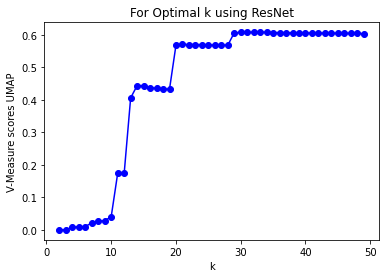

In [58]:
v_measure_scores_umap_resnet =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_assignment_umap_resnet = agglo_model.fit_predict(test_data_2_2)

    agglo_v_measure_resnet = v_measure_score(labels_pge, agglo_assignment_umap_resnet)
    v_measure_scores_umap_resnet.append(agglo_v_measure_resnet)
    
print("Best k for ResNet feature set:",v_measure_scores_umap_resnet.index(max(v_measure_scores_umap_resnet))+2)

plt.plot(K, v_measure_scores_umap_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores UMAP')
plt.title('For Optimal k using ResNet')
plt.show()

### Final Metrics of Agglomerative Clustering using Linkage='single'

In [59]:
pge_pca_silhouette_score = max(silhouette_scores_pca_pge)
pge_umap_silhouette_score = max(silhouette_scores_umap_pge)
resnet_pca_silhouette_score = max(silhouette_scores_pca_resnet)
resnet_umap_silhouette_score = max(silhouette_scores_umap_resnet)

pge_pca_v_measure = max(v_measure_scores_pca_pge)
pge_umap_v_measure = max(v_measure_scores_umap_pge)
resnet_pca_v_measure = max(v_measure_scores_pca_resnet)
resnet_umap_v_measure = max(v_measure_scores_umap_resnet)
print("Linkage='Single'")
df_single = pd.DataFrame({'Metrics': ['silhouette-PCA', 'silhouette-UMAP','VMeasure-PCA','VMeasure-UMAP'], 'PGE': [pge_pca_silhouette_score,pge_umap_silhouette_score,pge_pca_v_measure,pge_umap_v_measure ],'ResNet50':[resnet_pca_silhouette_score, resnet_umap_silhouette_score,resnet_pca_v_measure,resnet_umap_v_measure]}).set_index('Metrics')
df_single

Linkage='Single'


,PGE,ResNet50
Metrics,,
silhouette-PCA,0.344508,0.111404
silhouette-UMAP,0.533373,0.666218
VMeasure-PCA,0.019766,0.019899
VMeasure-UMAP,0.505295,0.607453


### Now, we are changing the linkage = 'ward', due to the nature of the feature set and to join the nearest branch based on the variance of each cluster.

Best k for PGE feature set: 2


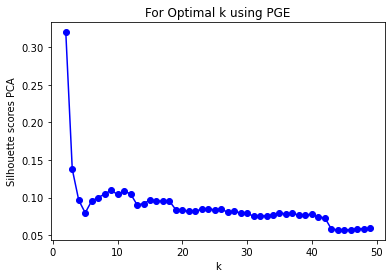

In [60]:
silhouette_scores_pca_pge =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1)
    
    agglo_silhouette_pge = silhouette_score(test_data_1, agglo_assignment_pca_pge)
    silhouette_scores_pca_pge.append(agglo_silhouette_pge)
    
print("Best k for PGE feature set:",silhouette_scores_pca_pge.index(max(silhouette_scores_pca_pge))+2)

plt.plot(K, silhouette_scores_pca_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette scores PCA')
plt.title('For Optimal k using PGE')
plt.show()


Best k for PGE feature set: 7


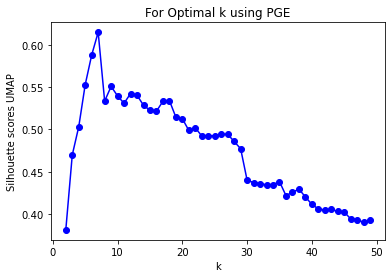

In [61]:
silhouette_scores_umap_pge =  []

for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_assignment_umap_pge = agglo_model.fit_predict(test_data_1_2)
    
    agglo_silhouette_pge = silhouette_score(test_data_1_2, agglo_assignment_umap_pge)
    silhouette_scores_umap_pge.append(agglo_silhouette_pge)
    
print("Best k for PGE feature set:",silhouette_scores_umap_pge.index(max(silhouette_scores_umap_pge))+2)

plt.plot(K, silhouette_scores_umap_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette scores UMAP')
plt.title('For Optimal k using PGE')
plt.show()


Best k for ResNet feature set: 4


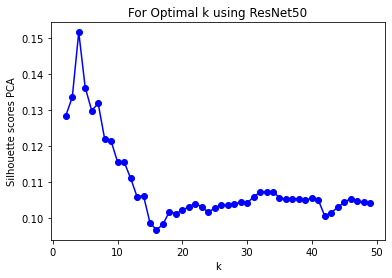

In [62]:
silhouette_scores_pca_resnet =  []

for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2)
    
    agglo_silhouette_resnet = silhouette_score(test_data_2, agglo_assignment_pca_resnet)
    silhouette_scores_pca_resnet.append(agglo_silhouette_resnet)
    
print("Best k for ResNet feature set:",silhouette_scores_pca_resnet.index(max(silhouette_scores_pca_resnet))+2)

plt.plot(K, silhouette_scores_pca_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette scores PCA')
plt.title('For Optimal k using ResNet50')
plt.show()

Best k for ResNet feature set: 5


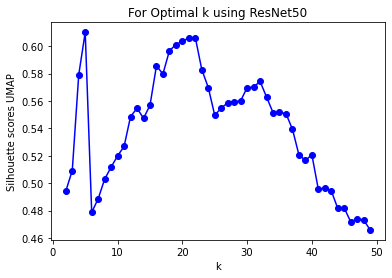

In [63]:
silhouette_scores_umap_resnet =  []

for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_assignment_umap_resnet = agglo_model.fit_predict(test_data_2_2)
    
    agglo_silhouette_resnet = silhouette_score(test_data_2_2, agglo_assignment_umap_resnet)
    silhouette_scores_umap_resnet.append(agglo_silhouette_resnet)
    
print("Best k for ResNet feature set:",silhouette_scores_umap_resnet.index(max(silhouette_scores_umap_resnet))+2)

plt.plot(K, silhouette_scores_umap_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette scores UMAP')
plt.title('For Optimal k using ResNet50')
plt.show()

Best k for PGE feature set: 26


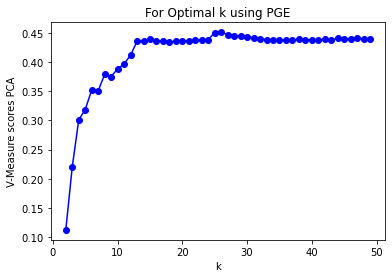

In [64]:
v_measure_scores_pca_pge =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1)

    agglo_v_measure_pge = v_measure_score(labels_pge, agglo_assignment_pca_pge)
    v_measure_scores_pca_pge.append(agglo_v_measure_pge)
    
print("Best k for PGE feature set:",v_measure_scores_pca_pge.index(max(v_measure_scores_pca_pge))+2)

plt.plot(K, v_measure_scores_pca_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores PCA')
plt.title('For Optimal k using PGE')
plt.show()

Best k for PGE feature set: 18


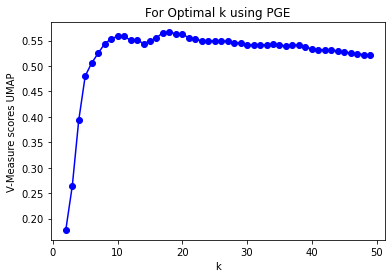

In [65]:
v_measure_scores_umap_pge =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_assignment_umap_pge = agglo_model.fit_predict(test_data_1_2)

    agglo_v_measure_pge = v_measure_score(labels_pge, agglo_assignment_umap_pge)
    v_measure_scores_umap_pge.append(agglo_v_measure_pge)
    
print("Best k for PGE feature set:",v_measure_scores_umap_pge.index(max(v_measure_scores_umap_pge))+2)

plt.plot(K, v_measure_scores_umap_pge, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores UMAP')
plt.title('For Optimal k using PGE')
plt.show()

Best k for ResNet feature set: 12


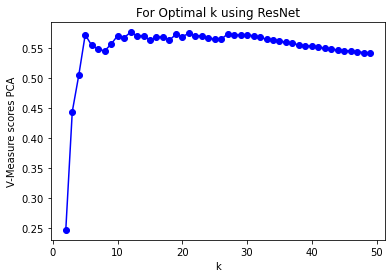

In [66]:
v_measure_scores_pca_resnet =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2)

    agglo_v_measure_resnet = v_measure_score(labels_resnet, agglo_assignment_pca_resnet)
    v_measure_scores_pca_resnet.append(agglo_v_measure_resnet)
    
print("Best k for ResNet feature set:",v_measure_scores_pca_resnet.index(max(v_measure_scores_pca_resnet))+2)

plt.plot(K, v_measure_scores_pca_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores PCA')
plt.title('For Optimal k using ResNet')
plt.show()

Best k for ResNet feature set: 15


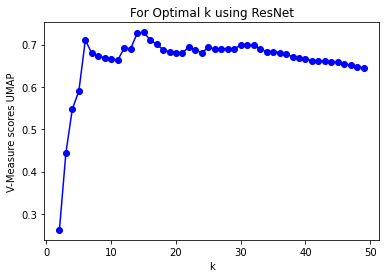

In [67]:
v_measure_scores_umap_resnet =  []
for k in K:
    agglo_model= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_assignment_umap_resnet = agglo_model.fit_predict(test_data_2_2)

    agglo_v_measure_resnet = v_measure_score(labels_resnet, agglo_assignment_umap_resnet)
    v_measure_scores_umap_resnet.append(agglo_v_measure_resnet)
    
print("Best k for ResNet feature set:",v_measure_scores_umap_resnet.index(max(v_measure_scores_umap_resnet))+2)

plt.plot(K, v_measure_scores_umap_resnet, 'bo-')
plt.xlabel('k')
plt.ylabel('V-Measure scores UMAP')
plt.title('For Optimal k using ResNet')
plt.show()

## Final Metrics for Agglomerative Clustering using Linkage='ward'

In [68]:
pge_pca_silhouette_score = max(silhouette_scores_pca_pge)
pge_umap_silhouette_score = max(silhouette_scores_umap_pge)
resnet_pca_silhouette_score = max(silhouette_scores_pca_resnet)
resnet_umap_silhouette_score = max(silhouette_scores_umap_resnet)

pge_pca_v_measure = max(v_measure_scores_pca_pge)
pge_umap_v_measure = max(v_measure_scores_umap_pge)
resnet_pca_v_measure = max(v_measure_scores_pca_resnet)
resnet_umap_v_measure = max(v_measure_scores_umap_resnet)
print("Linkage='Ward'")
df_ward = pd.DataFrame({'Metrics': ['silhouette-PCA', 'silhouette-UMAP','VMeasure-PCA','VMeasure-UMAP'], 'PGE': [pge_pca_silhouette_score,pge_umap_silhouette_score,pge_pca_v_measure,pge_umap_v_measure ],'ResNet50':[resnet_pca_silhouette_score, resnet_umap_silhouette_score,resnet_pca_v_measure,resnet_umap_v_measure]}).set_index('Metrics')
df_ward

Linkage='Ward'


,PGE,ResNet50
Metrics,,
silhouette-PCA,0.319998,0.151562
silhouette-UMAP,0.615047,0.610128
VMeasure-PCA,0.450976,0.576000
VMeasure-UMAP,0.566360,0.729171


### Metrics Comparison for Agglomerative Clustering (Linkage = 'Ward' vs Linkage = 'single'):

In [69]:
print("Linkage: Ward")
display(df_ward)
print("Linkage: Single")
display(df_single)

Linkage: Ward


,PGE,ResNet50
Metrics,,
silhouette-PCA,0.319998,0.151562
silhouette-UMAP,0.615047,0.610128
VMeasure-PCA,0.450976,0.576000
VMeasure-UMAP,0.566360,0.729171


Linkage: Single


,PGE,ResNet50
Metrics,,
silhouette-PCA,0.344508,0.111404
silhouette-UMAP,0.533373,0.666218
VMeasure-PCA,0.019766,0.019899
VMeasure-UMAP,0.505295,0.607453


### Overall, we can observe that we get better perfomance scores and accpetable clusters when we cluster with the respect to the variance of each cluster i.e. when linkage = 'ward'.

### Since, the ground truth labels are also available for the both feature set, we consider the performance measurements using V-measure whose values are close to 1 for both the projections. The optimal cluster 'k' where we get the best cluster quality is provided below along with its members:

In [70]:
best_k_pge_pca_v_measure = v_measure_scores_pca_pge.index(max(v_measure_scores_pca_pge))+2
best_k_pge_umap_v_measure = v_measure_scores_umap_pge.index(max(v_measure_scores_umap_pge))+2
best_k_resnet_pca_v_measure = v_measure_scores_pca_resnet.index(max(v_measure_scores_pca_resnet))+2
best_k_resnet_umap_v_measure = v_measure_scores_umap_resnet.index(max(v_measure_scores_umap_resnet))+2

In [71]:
print('Using PCA:')
agglo_model= AgglomerativeClustering(n_clusters=best_k_pge_pca_v_measure, affinity='euclidean', linkage='ward')
agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1)

# print('Number of clusters from Agglomerative-PGE: %d and from Agglomerative-ResNet: %d'%(np.unique(agglo_assignment_pca_pge).shape[0],np.unique(kmeans_assignment_resnet).shape[0]))

agglo_counts_pge = np.unique(agglo_assignment_pca_pge, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': agglo_counts_pge[0], 'Number of members':agglo_counts_pge[1]}).set_index('Cluster Index')


print('AgglomerativeClustering-PGE_PCA assignment counts')
pge_df

Using PCA:
AgglomerativeClustering-PGE_PCA assignment counts


,Number of members
Cluster Index,
0,463
1,293
2,511
3,236
4,30
5,121
6,184
7,197
8,233


In [72]:
agglo_model= AgglomerativeClustering(n_clusters=best_k_resnet_pca_v_measure, affinity='euclidean', linkage='ward')
agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2)

agglo_counts_resnet = np.unique(agglo_assignment_pca_resnet, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': agglo_counts_resnet[0], 'Number of members':agglo_counts_resnet[1]}).set_index('Cluster Index')


print('AgglomerativeClustering-Resnet_PCA assignment counts')
pge_df

AgglomerativeClustering-Resnet_PCA assignment counts


,Number of members
Cluster Index,
0,381
1,534
2,761
3,340
4,401
5,359
6,434
7,314
8,617


In [73]:
print('Using UMAP:')
agglo_model= AgglomerativeClustering(n_clusters=best_k_pge_umap_v_measure, affinity='euclidean', linkage='ward')
agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1_2)

# print('Number of clusters from Agglomerative-PGE: %d and from Agglomerative-ResNet: %d'%(np.unique(agglo_assignment_pca_pge).shape[0],np.unique(kmeans_assignment_resnet).shape[0]))

agglo_counts_pge = np.unique(agglo_assignment_pca_pge, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': agglo_counts_pge[0], 'Number of members':agglo_counts_pge[1]}).set_index('Cluster Index')


print('AgglomerativeClustering-PGE_UMAP assignment counts')
pge_df

Using UMAP:
AgglomerativeClustering-PGE_UMAP assignment counts


,Number of members
Cluster Index,
0,386
1,458
2,536
3,225
4,484
5,311
6,121
7,134
8,315


In [74]:
agglo_model= AgglomerativeClustering(n_clusters=best_k_resnet_umap_v_measure, affinity='euclidean', linkage='ward')
agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2_2)

agglo_counts_resnet = np.unique(agglo_assignment_pca_resnet, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': agglo_counts_resnet[0], 'Number of members':agglo_counts_resnet[1]}).set_index('Cluster Index')


print('AgglomerativeClustering-Resnet_UMAP assignment counts')
pge_df

AgglomerativeClustering-Resnet_UMAP assignment counts


,Number of members
Cluster Index,
0,1186
1,387
2,581
3,210
4,31
5,91
6,566
7,105
8,34


###  In real life application of unsupervised learning:
### 1. V-Measure is not a feasible measure to find the optimal number of clusters 'k' for a given dataset.
### 2. The real labels are never available in practical applications.

### Hence, we are considering the silhouette score to find the optimal number of clusters 'k' whose value ranges from -1 to 1. The optimal cluster 'k' where we get the best fit is provided below along with its members:

In [75]:
best_k_pge_pca_silhouette_score = silhouette_scores_pca_pge.index(max(silhouette_scores_pca_pge))+2
best_k_pge_umap_silhouette_score = silhouette_scores_umap_pge.index(max(silhouette_scores_umap_pge))+2
best_k_resnet_pca_silhouette_score = silhouette_scores_pca_resnet.index(max(silhouette_scores_pca_resnet))+2
best_k_resnet_umap_silhouette_score = silhouette_scores_umap_resnet.index(max(silhouette_scores_umap_resnet))+2

In [76]:
print('Using PCA:')
agglo_model= AgglomerativeClustering(n_clusters=best_k_pge_pca_silhouette_score, affinity='euclidean', linkage='ward')
agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1)

# print('Number of clusters from Agglomerative-PGE: %d and from Agglomerative-ResNet: %d'%(np.unique(agglo_assignment_pca_pge).shape[0],np.unique(kmeans_assignment_resnet).shape[0]))

agglo_counts_pge = np.unique(agglo_assignment_pca_pge, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': agglo_counts_pge[0], 'Number of members':agglo_counts_pge[1]}).set_index('Cluster Index')


print('AgglomerativeClustering-PGE_PCA assignment counts')
pge_df

Using PCA:
AgglomerativeClustering-PGE_PCA assignment counts


,Number of members
Cluster Index,
0,4201
1,799


In [77]:
agglo_model= AgglomerativeClustering(n_clusters=best_k_resnet_pca_silhouette_score, affinity='euclidean', linkage='ward')
agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2)

agglo_counts_resnet = np.unique(agglo_assignment_pca_resnet, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': agglo_counts_resnet[0], 'Number of members':agglo_counts_resnet[1]}).set_index('Cluster Index')


print('AgglomerativeClustering-Resnet_PCA assignment counts')
pge_df

AgglomerativeClustering-Resnet_PCA assignment counts


,Number of members
Cluster Index,
0,3370
1,715
2,381
3,534


In [78]:
print('Using UMAP:')
agglo_model= AgglomerativeClustering(n_clusters=best_k_pge_umap_silhouette_score, affinity='euclidean', linkage='ward')
agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1_2)

# print('Number of clusters from Agglomerative-PGE: %d and from Agglomerative-ResNet: %d'%(np.unique(agglo_assignment_pca_pge).shape[0],np.unique(kmeans_assignment_resnet).shape[0]))

agglo_counts_pge = np.unique(agglo_assignment_pca_pge, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': agglo_counts_pge[0], 'Number of members':agglo_counts_pge[1]}).set_index('Cluster Index')


print('AgglomerativeClustering-PGE_UMAP assignment counts')
pge_df

Using UMAP:
AgglomerativeClustering-PGE_UMAP assignment counts


,Number of members
Cluster Index,
0,2249
1,976
2,386
3,613
4,551
5,104
6,121


In [79]:
agglo_model= AgglomerativeClustering(n_clusters=best_k_resnet_umap_silhouette_score, affinity='euclidean', linkage='ward')
agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2_2)

agglo_counts_resnet = np.unique(agglo_assignment_pca_resnet, return_counts = True)
pge_df = pd.DataFrame({'Cluster Index': agglo_counts_resnet[0], 'Number of members':agglo_counts_resnet[1]}).set_index('Cluster Index')


print('AgglomerativeClustering-Resnet_UMAP assignment counts')
pge_df

AgglomerativeClustering-Resnet_UMAP assignment counts


,Number of members
Cluster Index,
0,3338
1,315
2,581
3,236
4,530


# Tissue type percentage in two different clustering configurations for both projections.

## 1. PGE Features Set:

For PGE


<ipython-input-80-54af8f6c40ef>:70: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



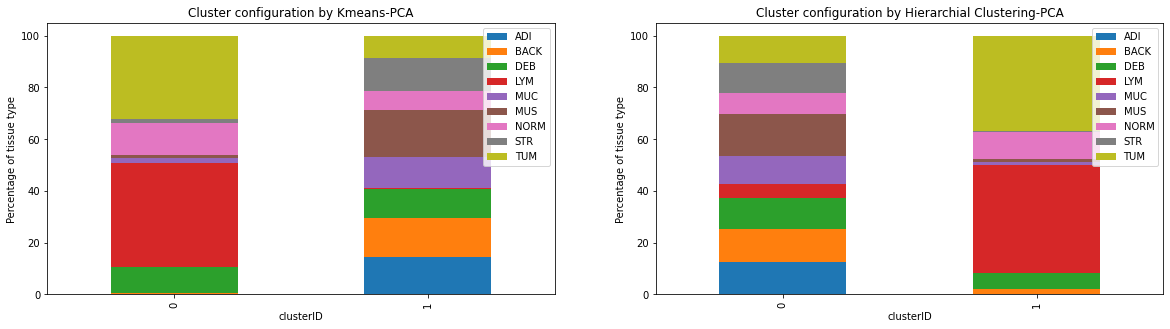

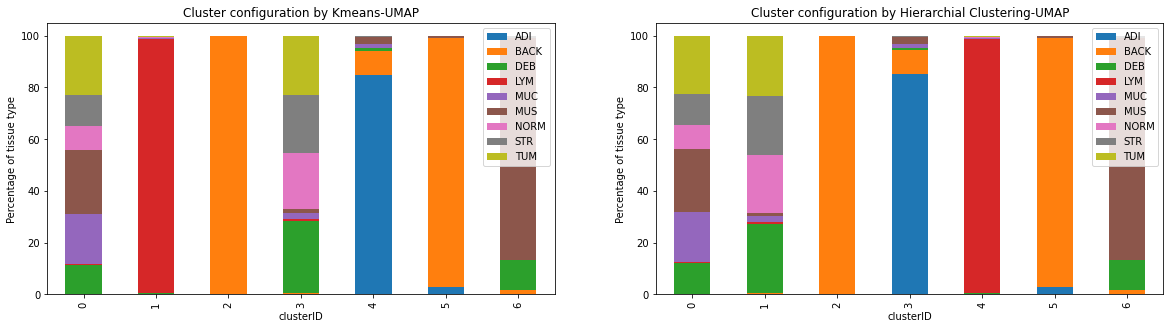

In [80]:
print("For PGE")
kmeans_model_pge = KMeans(n_clusters = Kmeans_best_k_pca_pge, random_state = 0) 
kmeans_assignment_pge = kmeans_model_pge.fit_predict(test_data_1)

resulted_cluster_df = pd.DataFrame({'clusterID': kmeans_assignment_pge, 'type': labels_pge})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans-PCA')


agglo_model= AgglomerativeClustering(n_clusters=best_k_pge_pca_silhouette_score, affinity='euclidean', linkage='ward')
agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1)

resulted_cluster_df = pd.DataFrame({'clusterID': agglo_assignment_pca_pge, 'type': labels_pge})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Hierarchial Clustering-PCA')


kmeans_model_pge = KMeans(n_clusters = Kmeans_best_k_umap_pge, random_state = 0) 
kmeans_assignment_pge = kmeans_model_pge.fit_predict(test_data_1_2)

resulted_cluster_df = pd.DataFrame({'clusterID': kmeans_assignment_pge, 'type': labels_pge})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans-UMAP')


agglo_model= AgglomerativeClustering(n_clusters=best_k_pge_umap_silhouette_score, affinity='euclidean', linkage='ward')
agglo_assignment_pca_pge = agglo_model.fit_predict(test_data_1_2)

resulted_cluster_df = pd.DataFrame({'clusterID': agglo_assignment_pca_pge, 'type': labels_pge})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Hierarchial Clustering-UMAP')
f.show() 

## 2. Resnet50 Features Set

For ResNet50


<ipython-input-81-e2261b8b0b93>:70: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



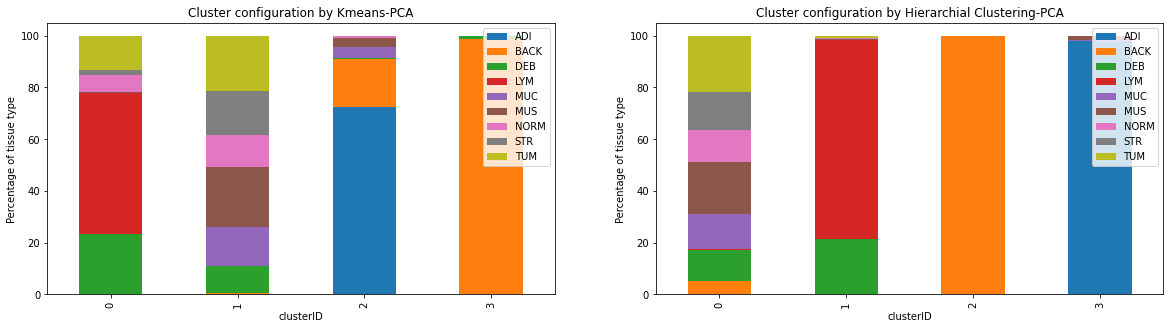

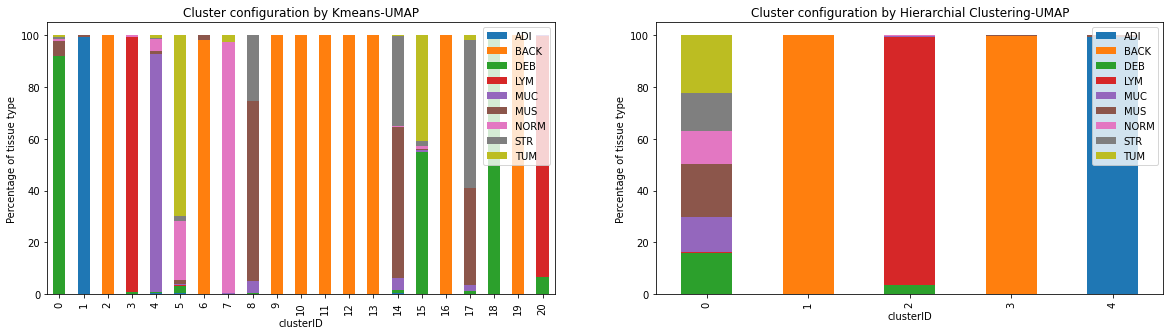

In [81]:
print("For ResNet50")
kmeans_model_pge = KMeans(n_clusters = Kmeans_best_k_pca_resnet, random_state = 0) 
kmeans_assignment_resnet = kmeans_model_pge.fit_predict(test_data_2)

resulted_cluster_df = pd.DataFrame({'clusterID': kmeans_assignment_resnet, 'type': labels_resnet})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans-PCA')


agglo_model= AgglomerativeClustering(n_clusters=best_k_resnet_pca_silhouette_score, affinity='euclidean', linkage='ward')
agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2)

resulted_cluster_df = pd.DataFrame({'clusterID': agglo_assignment_pca_resnet, 'type': labels_pge})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Hierarchial Clustering-PCA')


kmeans_model_pge = KMeans(n_clusters = Kmeans_best_k_umap_resnet, random_state = 0) 
kmeans_assignment_resnet = kmeans_model_pge.fit_predict(test_data_2_2)

resulted_cluster_df = pd.DataFrame({'clusterID': kmeans_assignment_resnet, 'type': labels_resnet})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans-UMAP')


agglo_model= AgglomerativeClustering(n_clusters=best_k_resnet_umap_silhouette_score, affinity='euclidean', linkage='ward')
agglo_assignment_pca_resnet = agglo_model.fit_predict(test_data_2_2)

resulted_cluster_df = pd.DataFrame({'clusterID': agglo_assignment_pca_resnet, 'type': labels_resnet})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Hierarchial Clustering-UMAP')
f.show() 

# Conclusion

### We used PGE and Resnet50 feature set and used their respective PCA and UMAP projections for clustering using two different techniques:
###    1. K-means clustering
###    2. Hierarchical clustering(Agglomerative)

### We tried using the elbow method in order to find the optimal cluster 'k'.But, since the elbow point is a naive method to find the optimal 'k'value. We used the silhouette scores to find the optimal 'k' for both the feature sets. 


### We also observed that the results were consistent for PGE dataset along both the projections.
### But for resnet50 featureset, we could notice a slight variation for the UMAP projections between the two clustering techniques. 

### It is clear that we get better values of cluster 'k' using v-measure performance metric provided we have the ground truth labels present compared to the values of cluster 'k' obtained using silhouette score performance metric.

### However, in real-life scenarios the ground truth labels are never available and thus, it is better to consider the silhouette score when measuring the performance of unsupervised machine learning techniques like clustering.